In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

## 1. title basics

In [2]:
df_title_basics = pd.read_csv('data/raw/title.basics.tsv', sep='\t', on_bad_lines='skip', dtype=str)

df_crew = pd.read_csv('data/raw/title.crew.tsv', sep='\t', on_bad_lines='skip', dtype=str)

In [3]:
df_title_basics
df_crew

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,nm0721526
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
11597899,tt9916848,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
11597900,tt9916850,nm1485677,"nm9187127,nm1485677,nm9826385,nm1628284"
11597901,tt9916852,nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284"
11597902,tt9916856,nm10538645,nm6951431


Removendo nulos em startYear, runtimeMinutes e genres

In [4]:
df_title_basics = df_title_basics.query(r'startYear != "\\N" and runtimeMinutes != "\\N" and genres != "\\N"')
df_title_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short
...,...,...,...,...,...,...,...,...,...
11597854,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,\N,49,Documentary
11597860,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Game-Show,Reality-TV"
11597895,tt9916840,tvEpisode,Horrid Henry's Comic Caper,Horrid Henry's Comic Caper,0,2014,\N,11,"Adventure,Animation,Comedy"
11597902,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


Identificando os tipos de titulos possiveis

In [5]:
df_title_basics['titleType'].value_counts()

titleType
tvEpisode       1891311
short            668778
movie            415430
video            204617
tvSeries          99490
tvMovie           97766
tvSpecial         23016
tvMiniSeries      20438
tvShort            9216
videoGame           415
Name: count, dtype: int64

In [6]:
df_title_basics[df_title_basics['titleType']=='tvMovie']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
29761,tt0030298,tvMovie,Julius Caesar,Julius Caesar,0,1938,\N,101,"Drama,History"
38051,tt0038738,tvMovie,A Midsummer Night's Dream,A Midsummer Night's Dream,0,1946,\N,150,"Drama,Fantasy"
38751,tt0039445,tvMovie,Hamlet Part 1,Hamlet Part 1,0,1947,\N,88,Drama
38924,tt0039618,tvMovie,The Merchant of Venice,The Merchant of Venice,0,1947,\N,90,Drama
39358,tt0040060,tvMovie,Wit and Wisdom,Wit and Wisdom,0,1948,\N,45,Comedy
...,...,...,...,...,...,...,...,...,...
11596959,tt9914738,tvMovie,Les oubliés de la Mer de Chine,Les oubliés de la Mer de Chine,0,1981,\N,45,Documentary
11597296,tt9915520,tvMovie,Fascism i en svart bil,Fascism i en svart bil,0,2019,\N,55,"Documentary,History"
11597587,tt9916192,tvMovie,Danielle Darrieux: Il est poli d'être gai!,Danielle Darrieux: Il est poli d'être gai!,0,2019,\N,53,"Biography,Documentary,History"
11597765,tt9916560,tvMovie,March of Dimes Presents: Once Upon a Dime,March of Dimes Presents: Once Upon a Dime,0,1963,\N,58,Family


Filtrando para filmes

In [7]:
df_title_basics = df_title_basics.loc[df_title_basics['titleType']=='movie'].drop(columns=['titleType'])
df_title_basics

,tconst,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
570,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
672,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy"
...,...,...,...,...,...,...,...,...
11597754,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,\N,123,Drama
11597795,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
11597822,tt9916680,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
11597844,tt9916730,6 Gunn,6 Gunn,0,2017,\N,116,Drama


In [8]:
df_title_basics['endYear'].unique()

array(['\\N'], dtype=object)

In [9]:
df_title_basics = df_title_basics.drop(columns=['endYear'])
df_title_basics

,tconst,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,Miss Jerry,Miss Jerry,0,1894,45,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport"
570,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama
672,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"
...,...,...,...,...,...,...,...
11597754,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,123,Drama
11597795,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,57,Documentary
11597822,tt9916680,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,100,Documentary
11597844,tt9916730,6 Gunn,6 Gunn,0,2017,116,Drama


In [10]:
df_title_basics['isAdult'].value_counts()

isAdult
0    409521
1      5909
Name: count, dtype: int64

In [11]:
df_title_basics.loc[df_title_basics['isAdult']=='1']

,tconst,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
61181,tt0062417,Un épais manteau de sang,Un épais manteau de sang,1,1968,88,"Crime,Drama"
62362,tt0063631,Space Thing,Space Thing,1,1968,70,"Comedy,Sci-Fi"
63625,tt0064929,The Amorous Headmaster,Sangen om den røde rubin,1,1970,107,"Comedy,Drama"
63883,tt0065197,We All Go Down,We All Go Down,1,1969,73,Drama
64065,tt0065383,All the Lovin' Kinfolk,All the Lovin' Kinfolk,1,1970,84,"Comedy,Drama"
...,...,...,...,...,...,...,...
11503860,tt9713908,Costa Dogging,Costa Dogging,1,2018,94,Adult
11504823,tt9716008,Different Strokes,Different Strokes,1,1973,78,Adult
11513970,tt9735434,Dogging in the sun,Dogging in the sun,1,2018,87,Adult
11528050,tt9765780,Hemmafruarnas hemliga sexliv,Hemmafruarnas hemliga sexliv,1,1981,73,Adult


Removendo filmes adultos

In [12]:
df_title_basics = df_title_basics.loc[df_title_basics['isAdult']=='0'].drop(columns=['isAdult'])
df_title_basics

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
8,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport"
570,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90,Drama
672,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy"
...,...,...,...,...,...,...
11597754,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama
11597795,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,57,Documentary
11597822,tt9916680,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,2007,100,Documentary
11597844,tt9916730,6 Gunn,6 Gunn,2017,116,Drama


In [13]:
df_title_basics['startYear'] = df_title_basics['startYear'].astype(int)
df_title_basics['runtimeMinutes'] = df_title_basics['runtimeMinutes'].astype(int)


In [14]:
df_title_basics['startYear'].describe()

count    409521.000000
mean       1997.951521
std          26.702142
min        1894.000000
25%        1984.000000
50%        2009.000000
75%        2017.000000
max        2029.000000
Name: startYear, dtype: float64

Retirando filmes com lançamento após 2025

In [15]:
df_title_basics = df_title_basics[df_title_basics['startYear']<=2025]

Text(0, 0.5, 'Number of Movies')

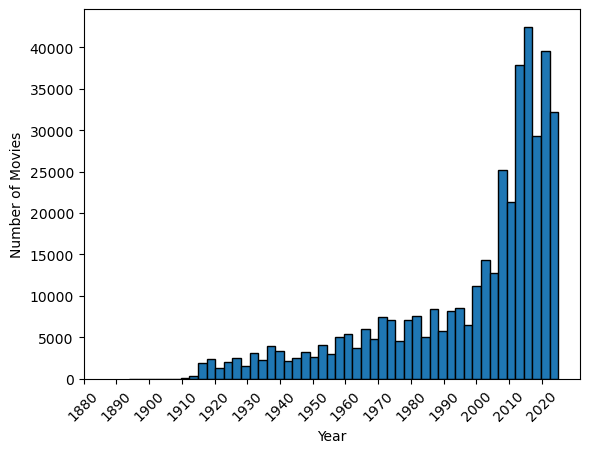

In [16]:
plt.hist(df_title_basics['startYear'], bins=50, edgecolor='black')
plt.xticks([i for i in range(1880, 2030, 10)], rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Movies')

Identificando os generos de filmes possiveis

In [17]:
aux = list(df_title_basics['genres'].unique())
unique_genres = set([])

for element in aux:
    if element != '\\N':
        for genre in element.split(','):
            unique_genres.add(genre)


unique_genres = sorted(list(unique_genres))
unique_genres

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [17]:
df_title_basics[df_title_basics['genres'].str.contains('Adult', na=False)]

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
119949,tt0123158,The Love Garden,The Love Garden,1971,72,"Adult,Romance"
7270541,tt30280401,Check in Check Out,Check in Check Out,2013,98,Adult


In [18]:
df_title_basics = df_title_basics[~df_title_basics['genres'].str.contains('Adult', na=False)]
df_title_basics

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
8,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport"
570,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90,Drama
672,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy"
...,...,...,...,...,...,...
11597754,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama
11597795,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,57,Documentary
11597822,tt9916680,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,2007,100,Documentary
11597844,tt9916730,6 Gunn,6 Gunn,2017,116,Drama


In [19]:
df_title_basics.loc[df_title_basics['runtimeMinutes'] > 1000]

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
4009,tt0004052,The Hazards of Helen,The Hazards of Helen,1914,1428,Action
159619,tt0165127,Burning of the Red Lotus Temple,Huo shao hong lian si,1928,1620,Drama
172860,tt0179184,****,****,1967,1500,Drama
271804,tt0284020,The Cure for Insomnia,The Cure for Insomnia,1987,5220,"Documentary,Music"
327890,tt0342707,The Longest Most Meaningless Movie in the World,The Longest Most Meaningless Movie in the World,1970,2880,"Documentary,Drama,History"
370779,tt0387271,A Twist of Fate,Hanmanheun namilsaeng,1970,1970,Drama
795780,tt0821950,A Mosca cieca,A Mosca cieca,1921,1035,Drama
1435661,tt10844900,Qw,Qw,2019,10062,Drama
1498727,tt10958742,Five-Year Diary,Five-Year Diary,1982,2160,Documentary
2225201,tt12277054,Carnets Filmés (Liste Complète),Carnets Filmés (Liste Complète),2019,28643,Documentary


Retirando documentarios

In [20]:
df_title_basics = df_title_basics.loc[~df_title_basics['genres'].str.contains('Documentary', na=False)]
df_title_basics

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
8,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance
570,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90,Drama
672,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy"
930,tt0000941,Locura de amor,Locura de amor,1909,45,Drama
...,...,...,...,...,...,...
11597586,tt9916190,Safeguard,Safeguard,2020,95,"Action,Adventure,Thriller"
11597625,tt9916270,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller
11597670,tt9916362,Coven,Akelarre,2020,92,"Drama,History"
11597754,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama


In [21]:
df_title_basics.to_csv('data/processed/title_basics_filtered.tsv.gz', sep='\t', compression='gzip', index=False)

## 2. title ratings

In [22]:
df_title_ratings = pd.read_csv('data/raw/title.ratings.tsv.gz', sep='\t')
df_title_ratings

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/title.ratings.tsv.gz'

In [24]:
df_title_ratings.describe()

,averageRating,numVotes
count,1.560382e+06,1.560382e+06
mean,6.950432e+00,1.022619e+03
std,1.386595e+00,1.781673e+04
min,1.000000e+00,5.000000e+00
25%,6.200000e+00,1.100000e+01
50%,7.100000e+00,2.600000e+01
75%,7.900000e+00,1.000000e+02
max,1.000000e+01,3.032739e+06


Text(0, 0.5, 'Number of Movies')

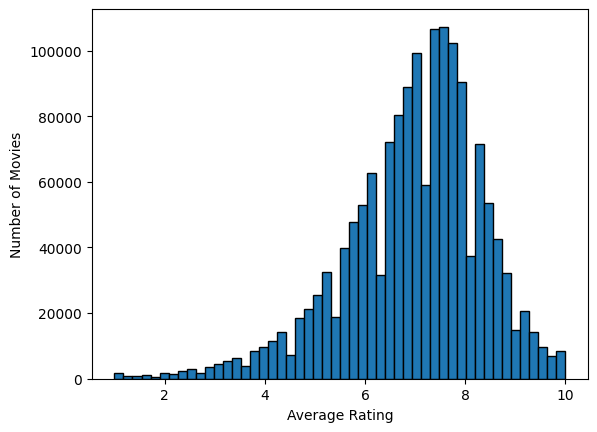

In [25]:
plt.hist(df_title_ratings['averageRating'], bins=50, edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')

Text(0, 0.5, 'Number of Movies in log scale')

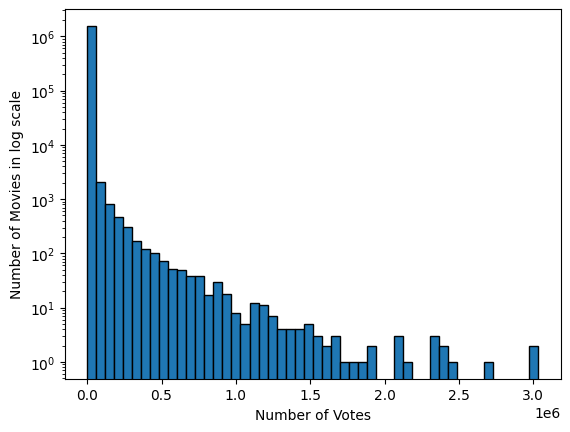

In [26]:
plt.hist(df_title_ratings['numVotes'], bins=50, edgecolor='black', log=True)
plt.xlabel('Number of Votes')
plt.ylabel('Number of Movies in log scale')

In [27]:
df_title_basics_ratings = df_title_basics.merge(df_title_ratings, on='tconst', how='left')
df_title_basics_ratings

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.4,223.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,983.0
2,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90,Drama,5.7,32.0
3,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.3,79.0
4,tt0000941,Locura de amor,Locura de amor,1909,45,Drama,4.8,32.0
...,...,...,...,...,...,...,...,...
306017,tt9916190,Safeguard,Safeguard,2020,95,"Action,Adventure,Thriller",3.6,263.0
306018,tt9916270,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller,5.8,1506.0
306019,tt9916362,Coven,Akelarre,2020,92,"Drama,History",6.4,6033.0
306020,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama,8.3,9.0


Filmes sem avaliação

In [28]:
df_title_basics_ratings[df_title_basics_ratings['numVotes'].isna()]

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
47,tt0002978,Hoodman Blind,Hoodman Blind,1913,50,Drama,NaN,NaN
54,tt0003048,A Lady of Quality,A Lady of Quality,1913,50,Drama,NaN,NaN
55,tt0003076,Livets konflikter,Livets konflikter,1913,64,Drama,NaN,NaN
66,tt0003306,På livets ödesvägar,På livets ödesvägar,1913,57,Drama,NaN,NaN
70,tt0003335,The Robbers,The Robbers,1913,56,Drama,NaN,NaN
...,...,...,...,...,...,...,...,...
305993,tt9909418,White Dresses,White Dresses,1996,50,Drama,NaN,NaN
305994,tt9909650,Hellbiro,Hellbiro,2018,95,Comedy,NaN,NaN
306004,tt9911750,Chambu Gabale,Chambu Gabale,1989,131,Comedy,NaN,NaN
306006,tt9913594,Bacchanalia,Bacchanalia,2017,72,"Drama,Mystery,Thriller",NaN,NaN


Removendo filmes sem avaliação

In [29]:
df_title_basics_ratings = df_title_basics_ratings.dropna()
df_title_basics_ratings

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.4,223.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,983.0
2,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90,Drama,5.7,32.0
3,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.3,79.0
4,tt0000941,Locura de amor,Locura de amor,1909,45,Drama,4.8,32.0
...,...,...,...,...,...,...,...,...
306017,tt9916190,Safeguard,Safeguard,2020,95,"Action,Adventure,Thriller",3.6,263.0
306018,tt9916270,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller,5.8,1506.0
306019,tt9916362,Coven,Akelarre,2020,92,"Drama,History",6.4,6033.0
306020,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama,8.3,9.0


In [ ]:
df_title_basics_ratings.to_csv('/home/lenovo/Documentos/Disciplinas 2025-1/tarefa-4-explorador_interativo_filmes/data/processed/title_basics_with_ratings.tsv.gz', sep='\t', compression='gzip', index=False)

NameError: name 'df_title_basics_ratings' is not defined

In [24]:
df = pd.read_csv('/home/lenovo/Documentos/Disciplinas 2025-1/tarefa-4-explorador_interativo_filmes/data/processed/title_basics_with_ratings.tsv.gz', sep='\t', on_bad_lines='skip', dtype=str)

In [ ]:
df_crew = pd.read_csv('/home/lenovo/Documentos/Disciplinas 2025-1/tarefa-4-explorador_interativo_filmes/data/raw/title.crew.tsv', sep='\t', on_bad_lines='skip', dtype=str)
df_crew = df_crew.dropna(subset=['directors'])
df = pd.merge(df, df_crew[['tconst', 'directors']], on='tconst', how='inner')


df['directors'] = df['directors'].str.split(',')

In [ ]:
import networkx as nx
from collections import defaultdict
from itertools import combinations


director_dict = defaultdict(list)

for _, row in df.iterrows():
    for director in row['directors']:
        director_dict[director].append(row['tconst'])


G = nx.Graph()
G.add_nodes_from(df['tconst'])


for movies in director_dict.values():
    for movie1, movie2 in combinations(movies, 2):
        if G.has_edge(movie1, movie2):
            G[movie1][movie2]['weight'] += 1
        else:
            G.add_edge(movie1, movie2, weight=1)

print(f" Nodos (películas): {G.number_of_nodes()}")
print(f" Aristas (conexiones por director): {G.number_of_edges()}")


🔹 Nodos (películas): 236982
🔹 Aristas (conexiones por director): 2016518


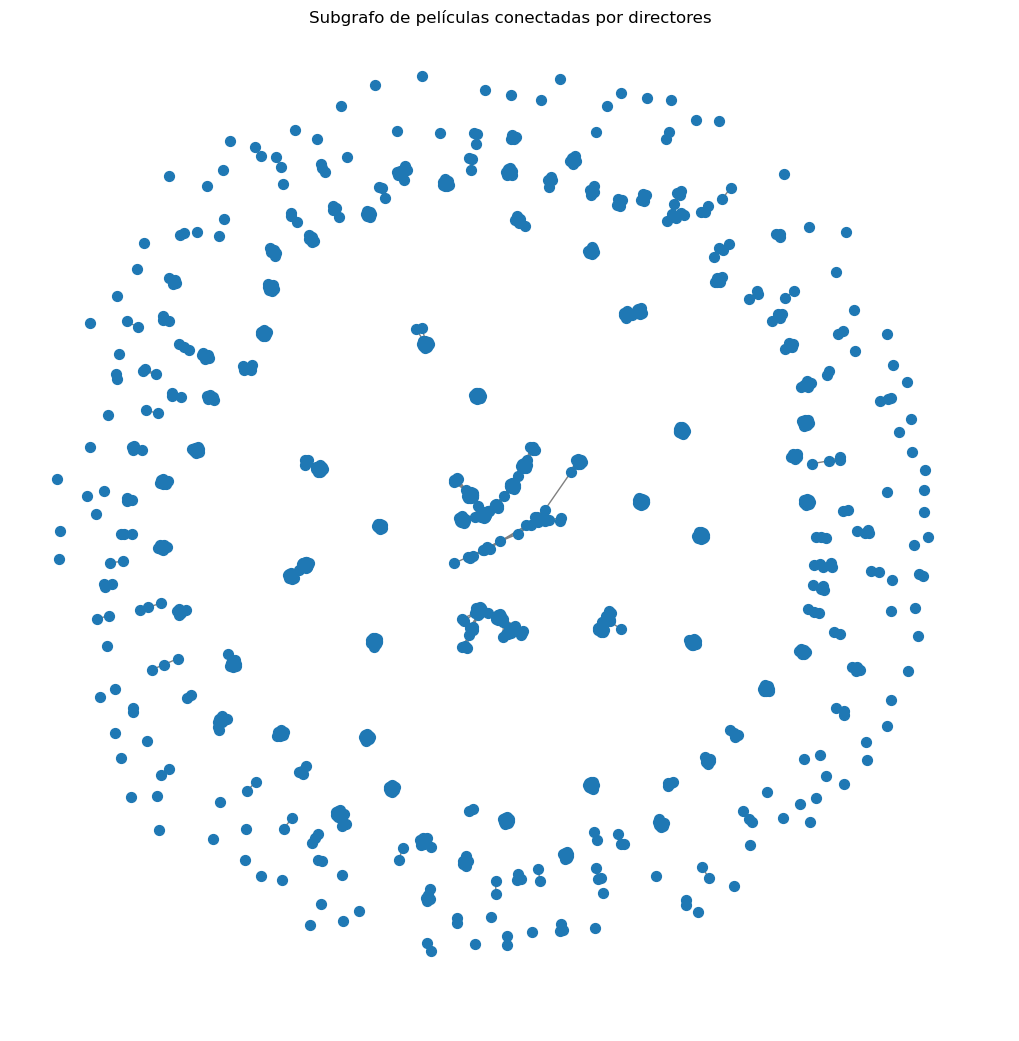

In [35]:
subset = list(G.nodes)[:1000]
subG = G.subgraph(subset)

plt.figure(figsize=(10, 10))
nx.draw(subG, with_labels=False, node_size=50, edge_color='gray')
plt.title("Subgrafo de películas conectadas por directores")
plt.show()
